<a href="https://colab.research.google.com/github/feliperost/cineclube/blob/main/Cineclube_teste.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from google.colab import files


uploaded = files.upload()

Saving cineclube.csv to cineclube.csv


In [3]:
import io

# importando o arquivo e determinando que as vírgulas são decimais, transformando as notas em valores numéricos
df = pd.read_csv(io.BytesIO(uploaded['cineclube.csv']), decimal=',')

print(df)

                     Filme  tadolfo  rost  mendonsa  xaubiro  cambe  stefano  \
0         Badlands - 13/05      7.5   8.0      7.50      2.0    7.5      7.0   
1         Prova_dOrchestra      6.5   7.0      7.25     10.0    4.0      6.0   
2   Brutti_Sporchi_Cattivi      6.5   4.5      7.50      5.0    7.0      7.3   
3                   Trafic      7.5   9.0      7.00      8.0    4.0      5.0   
4               Tilsammans      8.5   7.0      7.00      6.0    8.0      9.0   
..                     ...      ...   ...       ...      ...    ...      ...   
61          AMulherDeTodos      NaN   7.0       NaN      NaN    NaN      NaN   
62       OLoboAtrasDaPorta      NaN   7.0      7.00      NaN    NaN      NaN   
63        MedidaProvisória      6.0   6.0      5.00      NaN    NaN      NaN   
64       TriangleOfSadness      6.5   7.5      7.80      NaN    NaN      6.5   
65                   Hausu      NaN   9.0      8.00      NaN    NaN      8.0   

    tazima  freitas  duba  média do fil

In [4]:
df.head()

,Filme,tadolfo,rost,mendonsa,xaubiro,cambe,stefano,tazima,freitas,duba,média do filme
0,Badlands - 13/05,7.5,8.0,7.50,2.0,7.5,7.0,7.7,NaN,NaN,6.7
1,Prova_dOrchestra,6.5,7.0,7.25,10.0,4.0,6.0,5.0,9.0,4.0,6.5
2,Brutti_Sporchi_Cattivi,6.5,4.5,7.50,5.0,7.0,7.3,2.0,6.0,4.0,5.5
3,Trafic,7.5,9.0,7.00,8.0,4.0,5.0,7.5,NaN,NaN,6.9
4,Tilsammans,8.5,7.0,7.00,6.0,8.0,9.0,8.0,9.0,4.0,7.4


In [25]:
df.describe()

,tadolfo,rost,mendonsa,xaubiro,cambe,stefano,tazima,freitas,duba,média do filme
count,25.00000,66.000000,62.000000,32.000000,26.000000,45.000000,30.000000,34.000000,26.000000,63.000000
mean,7.06000,6.652273,6.912097,6.309375,6.250000,7.135556,6.845000,7.073529,4.769231,6.598413
std,1.11168,1.944310,1.123325,2.882915,1.919635,1.308044,1.836993,2.335926,2.045633,1.333863
min,4.00000,2.000000,4.500000,0.000000,3.000000,4.000000,2.000000,1.000000,2.000000,3.100000
25%,6.50000,5.500000,6.125000,4.750000,4.625000,6.000000,6.000000,6.000000,4.000000,5.800000
50%,7.00000,7.000000,7.000000,7.000000,6.750000,7.300000,7.250000,6.500000,4.000000,6.700000
75%,7.50000,8.000000,7.500000,8.250000,7.875000,8.000000,8.000000,9.375000,6.000000,7.600000
max,9.00000,10.000000,10.000000,10.000000,10.000000,9.500000,10.000000,10.000000,10.000000,9.600000


In [5]:
# nota média dada por rost
media_rost = df['rost'].mean()

print(media_rost)

6.652272727272727


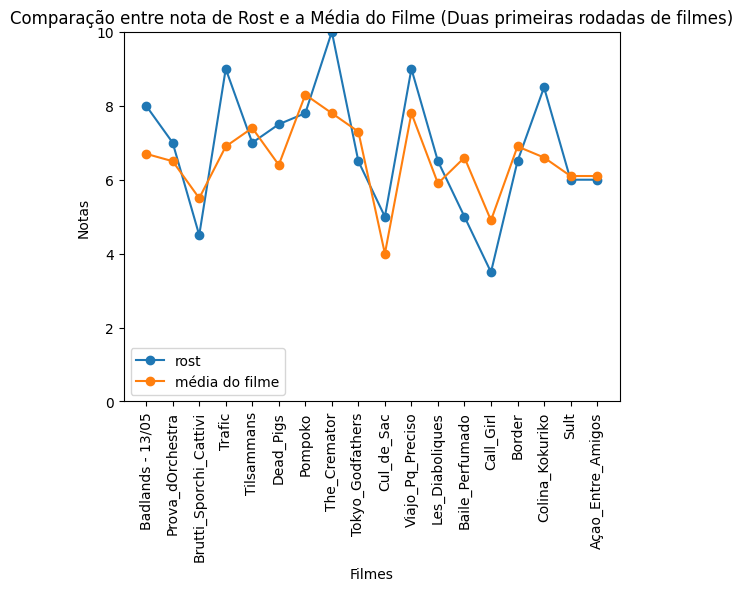

In [6]:
%matplotlib inline

# Comparando as notas dadas por Rost à nota média recebida pelos filmes das duas primeiras rodadas

df_sliced = df[:18] # Limitando o dataframe aos 18 primeiros resultados (2 primeiras rodadas, 9 filmes por rodada)

df_sliced.plot(x="Filme", y=["rost", "média do filme"], marker="o")
plt.title("Comparação entre nota de Rost e a Média do Filme (Duas primeiras rodadas de filmes)")
plt.xlabel("Filmes")
plt.ylabel("Notas")
plt.xticks(rotation=90) # rotaciona a descrição do eixo x, para melhor visualização
plt.ylim(0, 10) # configura o eixo y para mostrar valores de 0 a 10 (range possível de notas)
plt.xticks(range(len(df_sliced)), df_sliced["Filme"])
plt.legend(loc='lower left') # ajustando a posição da legenda

plt.show()




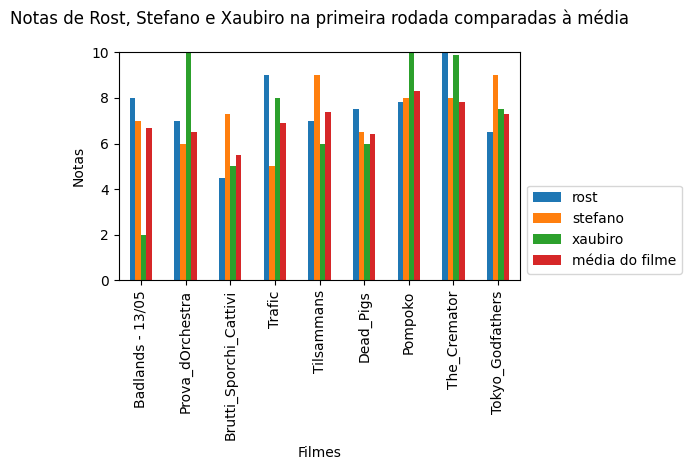

In [7]:
df_sliced = df[:9]

df_sliced.plot.bar(x="Filme", y=["rost", "stefano", "xaubiro", "média do filme"])
plt.title("Notas de Rost, Stefano e Xaubiro na primeira rodada comparadas à média", pad=20)
plt.xlabel("Filmes")
plt.ylabel("Notas")
plt.xticks(rotation=90) # rotaciona a descrição do eixo x, para melhor visualização
plt.ylim(0, 10) # configura o eixo y para mostrar valores de 0 a 10 (range possível de notas)
plt.xticks(range(len(df_sliced)), df_sliced["Filme"])
plt.legend(loc='lower left', bbox_to_anchor=(1, 0)) # ajustando a posição da legenda para fora do gráfico

plt.tight_layout()
plt.show()

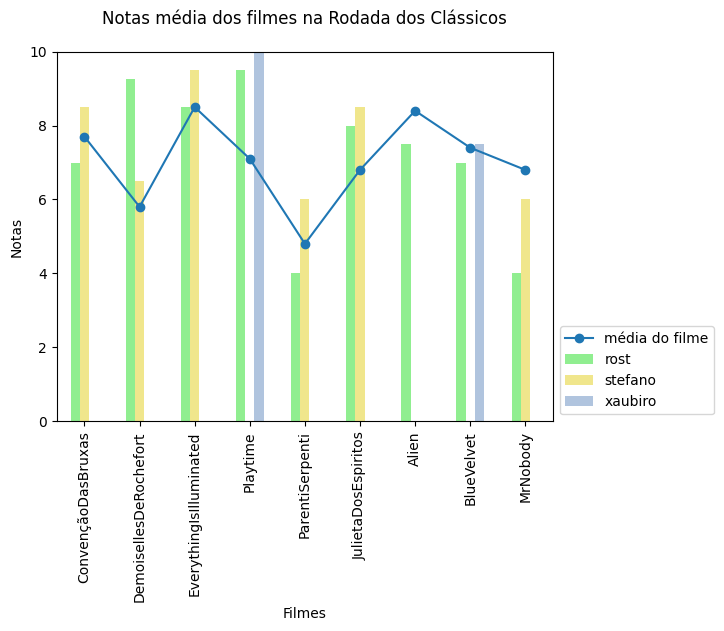

In [8]:
# delimitando o intervalo de filmes que constituiu a Rodada dos Clássicos,
# em que cada membro do clube indicou um de seus filmes favoritos
df_classicos = df[45:54]

# criando um grafico de linha só com a média
ax = df_classicos.plot(x="Filme", y=["média do filme"], marker="o")

# aplicando grafico de barra para as notas, e o de linha para a média
df_classicos.plot.bar(x="Filme", y=["rost", "stefano", "xaubiro"], ax=ax, color=['lightgreen', 'khaki', 'lightsteelblue'])

# configurando o gráfico
plt.title("Notas média dos filmes na Rodada dos Clássicos", pad=20)
plt.xlabel("Filmes")
plt.ylabel("Notas")
plt.xticks(rotation=90) # rotaciona a descrição do eixo x
plt.ylim(0, 10) # eixo y com valores de 0 a 10
plt.legend(loc='lower left', bbox_to_anchor=(1, 0)) # posição da legenda

plt.show()

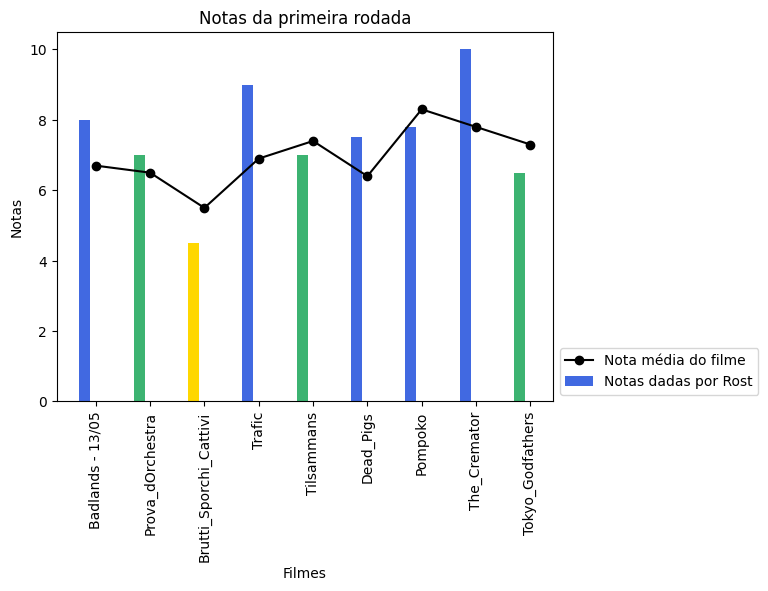

In [19]:
from matplotlib.colors import ListedColormap

# Define as cores para cada intervalo de valores
colors = ["firebrick", "gold", "mediumseagreen", "royalblue"]
# o objeto importado ListedColormap automaticamente divide em 4 partes (por termos definido 4 cores) de 0 a 1.
cmap = ListedColormap(colors)

# Cria o gráfico de barras
fig, ax = plt.subplots()
df_sliced = df[:9]

bar_width = 0.2
# na última parte de rost_bars abaixo, color=cmap / 10 é feito para que os valores das notas se enquadrem de 0 a 1,
# podendo assim se encaixar no intervalo de valores do cmap
rost_bars = ax.bar(np.arange(len(df_sliced)), df_sliced["rost"], bar_width, label="Notas dadas por Rost", color=cmap(df_sliced["rost"] / 10))

# adiciona a linha da média com marcadores 'o'
ax.plot(np.arange(len(df_sliced)) + bar_width, df_sliced["média do filme"], marker='o', linestyle='-', color='black', label="Nota média do filme")

# configurando o gráfico
ax.set_xlabel("Filmes")
ax.set_ylabel("Notas")
ax.set_title("Notas da primeira rodada")
ax.set_xticks(np.arange(len(df_sliced)) + bar_width)
ax.set_xticklabels(df_sliced["Filme"], rotation=90)
ax.legend(loc='lower left', bbox_to_anchor=(1, 0))

plt.show()

In [26]:
df.sort_values(by="rost", ascending=False).head()

,Filme,tadolfo,rost,mendonsa,xaubiro,cambe,stefano,tazima,freitas,duba,média do filme
7,The_Cremator,8.5,10.00,8.0,9.9,8.0,8.0,9.0,5.0,4.0,7.8
42,SussurrosDoCoração,NaN,10.00,7.0,NaN,7.0,NaN,8.0,10.0,NaN,8.4
19,Onde_Fica_a_Casa_Do_Meu_Amigo,NaN,9.50,6.0,9.0,9.0,6.5,NaN,10.0,2.0,7.4
48,Playtime,NaN,9.50,7.0,10.0,NaN,NaN,NaN,NaN,2.0,7.1
46,DemoisellesDeRochefort,NaN,9.25,5.5,NaN,NaN,6.5,NaN,NaN,2.0,5.8


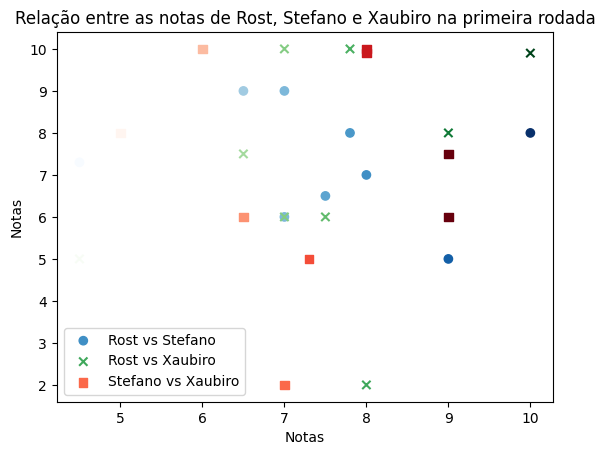

In [29]:
df_sliced = df[:9]

plt.scatter(df_sliced['rost'], df_sliced['stefano'], label='Rost vs Stefano', marker='o', c=df_sliced['rost'], cmap='Blues')
plt.scatter(df_sliced['rost'], df_sliced['xaubiro'], label='Rost vs Xaubiro', marker='x', c=df_sliced['rost'], cmap='Greens')
plt.scatter(df_sliced['stefano'], df_sliced['xaubiro'], label='Stefano vs Xaubiro', marker='s', c=df_sliced['stefano'], cmap='Reds')

plt.title('Relação entre as notas de Rost, Stefano e Xaubiro na primeira rodada')
plt.xlabel('Notas')
plt.ylabel('Notas')
plt.legend()
plt.show()

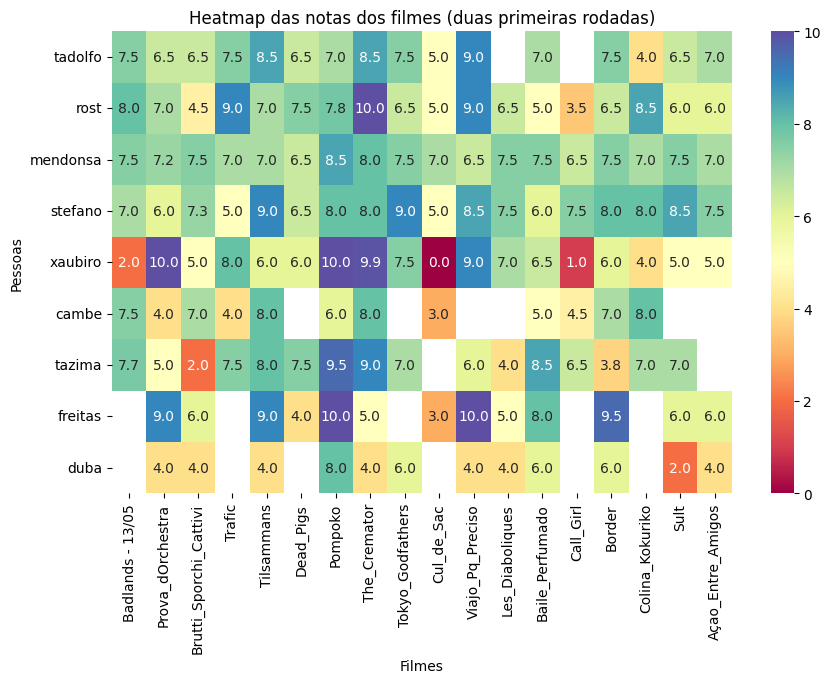

In [41]:
# criando um heatmap para visualizarmos as notas das duas primeiras rodadas

# Seleciona as duas primeiras rodadas e as colunas desejadas
df_heatmap = df[:18][['Filme', 'tadolfo', 'rost', 'mendonsa', 'stefano', 'xaubiro', 'cambe', 'tazima', 'freitas', 'duba']].set_index('Filme').T

plt.figure(figsize=(10, 6))
sns.heatmap(df_heatmap, annot=True, cmap='Spectral', fmt=".1f")
plt.title('Heatmap das notas dos filmes (duas primeiras rodadas)')
plt.xlabel('Filmes')
plt.ylabel('Pessoas')
plt.yticks(rotation=0)
plt.show()

# estudar algumas aplicações desse link:

https://medium.com/@teppan_noodle/exploratory-data-analysis-eda-using-python-f85938cb1810
